# 着陸船のシミュレーション
### lander.ipynbにmatplotlibを使用してグラフ化する
#### 自由落下のシミュレーション手法を応用すると、逆噴射を行って軟着陸する着陸船ロケットのシミュレーションができる。
#### 逆噴射を行ってロケットに上向きの加速度を与えると重力加速度gを相殺する動きがある。
## 『逆噴射を行えば燃料を消費するからロケットの質量が変化し、搭載する燃料の量の制限で逆噴射できる時間は限られている』
#### が、ここではこうした制約を一切無視することにする。
#### すると、一定の加速度aを与える逆噴射を行う場合の運動方程式は、自由落下の場合と同じ形式になる。

# dv/dt = g - a
# dx/dt = v

#### シミュレーションにあたっては逆噴射の強さは一定とし、逆噴射を開始する時刻をあらかじめ指定することにする。
#### これにより、たとえば
## 『高度100mから初速度0(m/s)で落下し始め、落下開始2秒後から逆噴射を行う』
#### といったシミュレーションが行える。

0.0000000 100.0000000 0.0000000
0.0100000 99.9990193 0.0980665
0.0200000 99.9970580 0.1961330
0.0300000 99.9941160 0.2941995
0.0400000 99.9901933 0.3922660
0.0500000 99.9852900 0.4903325
0.0600000 99.9794060 0.5883990
0.0700000 99.9725414 0.6864655
0.0800000 99.9646961 0.7845320
0.0900000 99.9558701 0.8825985
0.1000000 99.9460634 0.9806650
0.1100000 99.9352761 1.0787315
0.1200000 99.9235081 1.1767980
0.1300000 99.9107595 1.2748645
0.1400000 99.8970302 1.3729310
0.1500000 99.8823202 1.4709975
0.1600000 99.8666296 1.5690640
0.1700000 99.8499583 1.6671305
0.1800000 99.8323063 1.7651970
0.1900000 99.8136736 1.8632635
0.2000000 99.7940603 1.9613300
0.2100000 99.7734664 2.0593965
0.2200000 99.7518918 2.1574630
0.2300000 99.7293365 2.2555295
0.2400000 99.7058005 2.3535960
0.2500000 99.6812839 2.4516625
0.2600000 99.6557866 2.5497290
0.2700000 99.6293086 2.6477955
0.2800000 99.6018500 2.7458620
0.2900000 99.5734107 2.8439285
0.3000000 99.5439908 2.9419950
0.3100000 99.5135902 3.0400615
0.32000

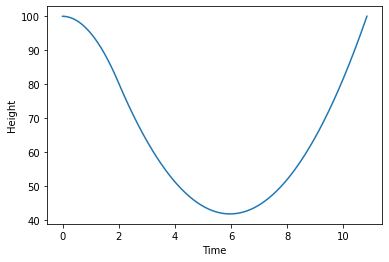

In [1]:
import matplotlib.pyplot as plt
import numpy as np


F = 1.5         #　逆噴射の加速度を決定する係数
G = 9.80665     #　重力加速度

#　関数の定義(逆噴射)
def retrofire(t,tf):
    if t >= tf:         #　落下し始めてtf(逆噴射開始時刻)より大きくなれば
        return -F * G   #　逆噴射
    else:
        return 0.0      #　逆噴射なし

t = 0.0     #　時刻t
h = 0.01    #　時刻の刻み幅

v = float(input())      #　初速度の入力
x0 = float(input())     #　初期高度の入力
tf = float(input())     #　逆噴射開始時刻の入力
x = x0                  #　初期高度の設定

print("{:.7f} {:.7f} {:.7f}".format(t, x, v))

tlist = [t]
xlist = [x]

#　自由落下のの計算
while (x>0) and (x<=x0):            #　地面に達するか初期高度より高くなるまで計算
    t += h                          #　時刻の更新
    v += (G + retrofire(t,tf)) * h  #　速度の計算(逆噴射計算込み)
    x -= v * h                      #　位置の更新
    print("{:.7f} {:.7f} {:.7f}".format(t, x, v))
    
    #　グラフデータに現在位置を追加
    tlist.append(t)
    xlist.append(x)

plt.plot(tlist,xlist)
plt.xlabel("Time")
plt.ylabel("Height")
plt.show()